# Assignment #1


Deep Learning / Fall 1398, Iran University of Science and Technology



---



**Please pay attention to these notes:**

<br/>
- **Assignment Due: ** 1398/08/18 23:59
- If you need any additional information, please review the assignment page on the course website.
- The items you need to answer are highlighted in red and the coding parts you need to implement are denoted by:
```
########################################
#     Put your implementation here     #
########################################
```
- We always recommend co-operation and discussion in groups for assignments. However, each student has to finish all the questions by himself/herself. If our matching system identifies any sort of copying, you'll be responsible for consequences. So, please mention his/her name if you have a team-mate.
- Students who audit this course should submit their assignments like other students to be qualified for attending the rest of the sessions.
- Finding any sort of copying will zero down that assignment grade and also will be counted as two negative assignment for your final score.
- When you are ready to submit, please follow the instructions at the end of this notebook.
- If you have any questions about this assignment, feel free to drop us a line. You may also post your questions on the course Forum page.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of its dependencies.
- **Before starting to work on the assignment Please fill your name in the next section *AND Remember to RUN the cell.* **

<br/>


Assignment Page: [https://iust-deep-learning.github.io/981/assignments/01_mlp_and_preprocessing](https://iust-deep-learning.github.io/981/assignments/01_mlp_and_preprocessing)

Course Forum: [https://groups.google.com/forum/#!forum/dl981/](https://groups.google.com/forum/#!forum/dl981/)



---



Fill your information here & run the cell

In [1]:
#@title Enter your information & "RUN the cell!!" { run: "auto" }
student_id = 95521387 #@param {type:"integer"}
student_name = "bardia karimi" #@param {type:"string"}
Your_Github_account_Email = "bardiakarimi77@yahoo.com" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)


from pathlib import Path

ASSIGNMENT_PATH = Path('asg01')
ASSIGNMENT_PATH.mkdir(parents=True, exist_ok=True)

your student id: 95521387
your name: bardia karimi


# 1. MLP

In class, we studied about MLP. In this part, you have to implement your own MLP and train and test it on the Iris dataset.


### Iris dataset
---
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

You can see [this](https://en.wikipedia.org/wiki/Iris_flower_data_set) link for more details.

Let's get this simple dataset and see some samples of it.

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

### Implementation
---
Before going any further, we have to import some prerequisites:

In [0]:
import numpy as np
import h5py

If you want to import some modules or implement some helper functions or classes you can do it in this cell.

In [0]:
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))


def diff_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

Now, implement your MLP from scratch.

In [0]:
class MLP(object):

  def __init__(self, inputLen, hiddenLen, outputLen, learningRate):
        self.inputLen = inputLen
        self.outputLen = outputLen
        self.hiddenLen = hiddenLen
        self.weight_1 = np.random.rand(self.inputLen, self.hiddenLen)
        self.weight_2 = np.random.rand(self.hiddenLen, self.outputLen)
        self.learningRate = learningRate
        self.inputLayer = np.arange(inputLen)
        self.hiddenLayer = np.arange(hiddenLen)
        self.outputLayer = np.arange(outputLen)
        self.fault = np.zeros((1, self.outputLen))
        
  def train(self, x, y):
    """
    train MLP model on train data

    Args:
      x: 2d numpy array or list of train data
      y: 1d or 2d numpy array or list of train data labels
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    for i in range(5):
      for j in range(len(x)):
        self.inputLayer = x[j]
        self.hiddenLayer = np.dot(self.inputLayer, self.weight_1)
        self.hiddenLayer = sigmoid(self.hiddenLayer)
        self.outputLayer = np.dot(self.hiddenLayer, self.weight_2)
        self.fault = y[j] - self.outputLayer
        self.faultHidden = np.dot(self.fault, self.weight_2.T)
        self.faultHidden -= self.hiddenLayer
        self.backPropagationLastLayer()
        self.backPropagationHiddenLayer()
      print("epoch " + str(i+1) + " is done")
  
    return True

  def backPropagationLastLayer(self):
        for i in range(self.hiddenLen):
            for j in range(self.outputLen):
                self.weight_2[i][j] += self.learningRate * self.fault[j] * diff_sigmoid(self.outputLayer[j]) * \
                                       self.hiddenLayer[i]

  def backPropagationHiddenLayer(self):
        for i in range(self.inputLen):
            for j in range(self.hiddenLen):
                self.weight_1[i][j] += self.learningRate * self.faultHidden[j] * diff_sigmoid(self.hiddenLayer[j]) * \
                                      self.inputLayer[i]
  
  def test(self, x, y):
    """
    test MLP model on test data

    Args:
      x: 2d numpy array or list of test data
      y: 1d or 2d numpy array or list of test data labels

    Returns:
      acc: In the simplest way ratio between the number of correct predicts with the number 
           of all train data
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    acc = 0.0
    for i in range(len(x)):
      ans = self.predict(x[i])
      print("ans  = " + str(ans) + " and correct = " + str(np.argmax(y[i])))
      if(ans == np.argmax(y[i])):
        acc += 0.1

    return acc
  
  def predict(self, x):
    """
    predict output of MLP model on input data

    Args:
      x: 1d or 2d numpy array or list of input data

    Returns:
      pred: 1d numpy array or list or integer that represent output predicted 
            from MLP
    """

    ########################################
    #     Put your implementation here     #
    ########################################

    self.inputLayer = x
    self.hiddenLayer = np.dot(self.inputLayer, self.weight_1)
    self.hiddenLayer = sigmoid(self.hiddenLayer)
    self.outputLayer = np.dot(self.hiddenLayer, self.weight_2)
    self.outputLayer = sigmoid(self.outputLayer)
    
    return np.argmax(self.outputLayer)
  
  def save_model(self, model_path):
    """
    save model to disk

    Args:
      model_path: path of model
    """

    ########################################
    #     Put your implementation here     #
    ########################################

    hf = h5py.File(model_path, 'w')
    hf.create_dataset('weight_1', data=self.weight_1)
    hf.create_dataset('weight_2', data=self.weight_2)
    hf.close()


    
    
    return True
  
  def load_model(self, model_path):
    """
    load model from disk

    Args:
      model_path: path of model
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    hf = h5py.File(model_path, 'r')
    self.weight_1 = hf['weight_1'][:]
    self.weight_2 = hf['weight_2'][:]
    hf.close()

    return True

In [0]:
def initialize_model():
  """
  initilize a MLP model that classify Iris dataset
  
  Returns:
    model: A MLP object
               
  Hint: Consider the number of features in the Iris dataset and the number of its classes 
        and initialize weights.
  """
  
  ########################################
  #     Put your implementation here     #
  ########################################
  model = MLP(4,10, 3, 0.1)

  
  return model

In [0]:
def split_train_test(x, y):
  """
  split input data and labels to train and test sections.
  
  Args:
    x: 2d numpy array or list of input data
    y: 1d or 2d numpy array or list of data labels
    
  Returns:
    train_data: 2d numpy array or list of train_data
    train_labels: 1d or 2d numpy array or list of train data labels
    test_data: 2d numpy array or list of test_data
    test_labels: 1d or 2d numpy array or list of test data labels
  """
  
  ########################################
  #     Put your implementation here     #
  ########################################
  train_data = []
  train_labels = []
  test_data = []
  test_labels = []

  for i in range(len(x)):
    if(i % 15 == 0):
      test_data.append(np.asarray(x[i]))
      if(y[i] == 0) :
        test_labels.append(np.asarray([1,0,0]))
      elif(y[i] == 1) :
        test_labels.append(np.asarray([0,1,0]))
      else :
        test_labels.append(np.asarray([0,0,1]))
    else :
      train_data.append(np.asarray(x[i]))
      if(y[i] == 0) :
        train_labels.append(np.asarray([1,0,0]))
      elif(y[i] == 1) :
        train_labels.append(np.asarray([0,1,0]))
      else :
        train_labels.append(np.asarray([0,0,1]))

  return train_data, train_labels, test_data, test_labels

Test your implementation(don't  change this cell):

In [0]:
mlp = initialize_model()
train_data, train_labels, test_data, test_labels = split_train_test(iris['data'], iris['target'])
mlp.train(train_data, train_labels)
mlp.save_model('my_model.h5')
del mlp
new_mlp = initialize_model()
new_mlp.load_model('my_model.h5')
print('your model accuracy on test data is: %s' % (new_mlp.test(test_data, test_labels)))

ans  = 0 and correct = 0
ans  = 0 and correct = 0
ans  = 0 and correct = 0
ans  = 0 and correct = 0
ans  = 2 and correct = 1
ans  = 2 and correct = 1
ans  = 2 and correct = 1
ans  = 2 and correct = 2
ans  = 2 and correct = 2
ans  = 2 and correct = 2
your model accuracy on test data is: 0.7


In class, we studied the mathematics behind the back-propagation when the activation function of the last layer is Relu. Now write equations related to the softmax activation function and obtain delta formulas for all layers.

$\color{red}{\text{Write your answer here}}$



# 2.Text classification 


In class, we studied how to build a basic dense model. Now we want to learn how to prepare a text dataset to feed into a provided model. First, we start with a simple dataset and then, we try a harder example.

## Sentiment Analysis on Movie Reviews 
This small dataset is available for free on NLTK. You can learn how to install `movie_reviews` dataset [here](https://www.nltk.org/data.html).



In [0]:
from keras.layers import Activation, Input, Dropout
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K


  ########################################
  #     Put your implementation here     #
  ########################################
import numpy as np
import math
import nltk , string
from nltk.corpus import movie_reviews 
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In every deep learning task, we need to divide our dataset into train and test categories. The train category is used to train the model, and the test one is used to evaluate the trained model. The proportion of train and test dataset does not have any specific formula, and it is up to you, but you should consider the majority of the dataset as the train one.

In [0]:
  '''
    Split the documents into train and test datasets
  '''
document = {'train': [], 'test': []} # Put the documents here
labels = {'train': [], 'test': []} # Put the labels here

  ########################################
  #     Put your implementation here     #
  ########################################

neg_data = movie_reviews.fileids('neg')
pos_data = movie_reviews.fileids('pos')

for i in range(900):
    document['train'].append(neg_data[100 + i])
    labels['train'].append([0,1])
    document['train'].append(pos_data[100+ i])
    labels['train'].append([1,0])
   
    
for i in range(100):
    document['test'].append(neg_data[i])
    labels['test'].append([0,1])
    document['test'].append(pos_data[i])
    labels['test'].append([1,0])

   

### Encoding the text data 

To feed the text data into a deep model, we must convert the strings to numerical data. A variety of approaches are available for this purpose, and we use two of them for this task: **One-Hot** and **TF-IDF** encodings 

### One-Hot encoding

one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0). So, in our case, we should convert each word to an array in which only one cell in the whole array must be 1, the one which represents that specific word. Then, to represent a document as a vector, we should sum all the words' vectors in the document.

In [0]:
'''
     Encode documents to One-Hot representation.
'''
xs = {'train': [], 'test': []} # Put the document vectors here

  ########################################
  #     Put your implementation here     #
  ########################################

words = []
for text in neg_data :
  movie = movie_reviews.raw(text).split()
  for word in movie :
    if word not in words :
      words.append(word)

for text in pos_data :
  movie = movie_reviews.raw(text).split()
  for word in movie :
    if word not in words :
       words.append(word)


tmp_movie =[]
for i in range (1800):
    movie = movie_reviews.raw(document.get('train')[i]).split()
    tmp = np.zeros(len(words))
    for x in movie :
      try:
        tmp[words.index(x)] = 1
      except ValueError:
        print("List does not contain value : " + x) 
    tmp_movie.append(tmp)

xs['train'] = np.array(tmp_movie)
tmp_movie =[]  
for i in range (200):
    movie = movie_reviews.raw(document.get('test')[i]).split()
    tmp = np.zeros(len(words))
    for x in movie :
      try:
        tmp[words.index(x)] = 1
      except ValueError:
        print("List does not contain value : " + x) 
    tmp_movie.append(tmp)
    
xs['test'] = np.array(tmp_movie)

As we studied in the TA class, for classification tasks we need to convert the labels into the one-hot format.

In [0]:
'''
     Convert labels into One-Hot representation.
'''
ys = {'train': [], 'test': []} # Put the label vectors here

  ########################################
  #     Put your implementation here     #
  ########################################
                            
ys['train'] = np.array(labels.get('train'))
ys['test'] = np.array(labels.get('test'))


Now we build and train the model, and then visualize the results.

In [0]:
def recall(y_true, y_pred):
    """
    Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    """
    Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.

    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))

def create_model(nb_classes, input_shape):
    """Create a MLP model."""
    input_ = Input(shape=input_shape)
    x = input_
    x = Dense(16, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(nb_classes)(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=input_, outputs=x)
    return model

In [0]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=2,
              validation_data=(data['x_test'], data['y_test']))

Train on 1800 samples, validate on 200 samples
Epoch 1/2
1800/1800 [==============================] - 1s 745us/step - loss: 0.5985 - acc: 0.7244 - f1: 0.7147 - recall: 0.7194 - precision: 0.7256 - val_loss: 0.4695 - val_acc: 0.8375 - val_f1: 0.8396 - val_recall: 0.8500 - val_precision: 0.8297
Epoch 2/2
1800/1800 [==============================] - 1s 372us/step - loss: 0.1959 - acc: 0.9661 - f1: 0.9661 - recall: 0.9661 - precision: 0.9662 - val_loss: 0.3338 - val_acc: 0.8675 - val_f1: 0.8677 - val_recall: 0.8700 - val_precision: 0.8656


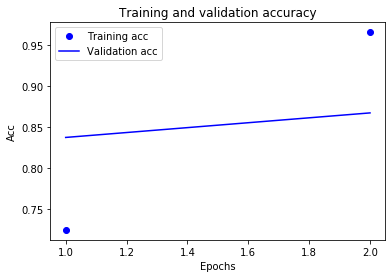

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

### TF-IDF encoding

TFIDF, short for term frequency-inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus[[1]](http://i.stanford.edu/~ullman/mmds/ch1.pdf). TF-IDF considers both frequencies of a word in the document and Inverse Document Frequency which determines whether a word is common in documents or not. You can learn more about this approach [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) to implement it. Note that you need to provide a vector for each document with the same shape as the One-Hot vector but with different values.

In [0]:
'''
     Encode documents to TF-IDF representation.
'''
xs = {'train': [], 'test': []} # Put the document vectors here



  ########################################
  #     Put your implementation here     #
  ########################################


maxLen = 0
N = len(document['train']) + len(document['test'])
idf_list  = {}
for text in document['train']:
  movie = movie_reviews.raw(text).split()
  if(len(movie) > maxLen):
    maxLen = len(movie)
  for word in movie :
    if idf_list.get(word) != None :
      idf_list[word] += 1
    else :
      idf_list[word] = 1
for text in document['test']:
  movie = movie_reviews.raw(text).split()
  for word in movie :
    if idf_list.get(word) != None :
      idf_list[word] += 1
    else :
      idf_list[word] = 1



tmp=[]
for i in document['train'] :
    tf = {}
    movie = movie_reviews.raw(i).split()
    for word in movie :
      if tf.get(word) != None :
        tf[word] += 1
      else :
        tf[word] = 1
    tf_idf = np.zeros(len(words))
    for word in tf.keys() :
      tf_idf[words.index(word)] = tf.get(word) * math.log(len(movie) /idf_list.get(word))
    tmp.append(tf_idf)
  
xs['train'] = np.asarray(tmp)

tmp=[]
for i in document['test'] :
    tf = {}
    movie = movie_reviews.raw(i).split()
    for word in movie :
      if tf.get(word) != None :
        tf[word] += 1
      else :
        tf[word] = 1
    tf_idf = np.zeros(len(words))
    for word in tf.keys() :
      tf_idf[words.index(word)] = tf.get(word) * math.log(len(movie) /idf_list.get(word))
    tmp.append(tf_idf)
  
xs['test'] = np.asarray(tmp)



Now we train and visualize our model again. Note that the result may vary concerning the preprocessing you do or the tokenizer you use to split your data.

In [0]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=2,
              validation_data=(data['x_test'], data['y_test']))

Train on 1800 samples, validate on 200 samples
Epoch 1/2
1800/1800 [==============================] - 1s 779us/step - loss: 0.6290 - acc: 0.6467 - f1: 0.6408 - recall: 0.6583 - precision: 0.6546 - val_loss: 0.5072 - val_acc: 0.8025 - val_f1: 0.7968 - val_recall: 0.7850 - val_precision: 0.8119
Epoch 2/2
1800/1800 [==============================] - 1s 357us/step - loss: 0.1808 - acc: 0.9606 - f1: 0.9609 - recall: 0.9650 - precision: 0.9572 - val_loss: 0.3741 - val_acc: 0.8600 - val_f1: 0.8625 - val_recall: 0.8750 - val_precision: 0.8507


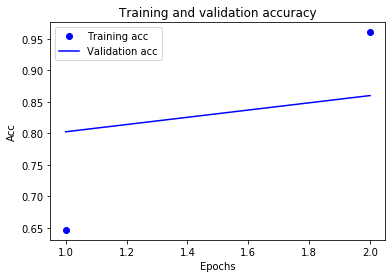

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

## Sentiment Analysis on IMDB

Working with this dataset is a bit tricky. download the dataset from [here](https://ai.stanford.edu/~amaas/data/sentiment/), then use the Training set as your whole dataset. You can use a sample of 12500 reviews if you faced any ram problems, but remember to include both negative and positive reviews equally.

In [0]:
 '''
    Import necessary modules, download and prepare the requested dataset
  '''
  ########################################
  #     Put your implementation here     #
  ########################################
import numpy as np
import glob

! wget -q https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar xvzf aclImdb_v1.tar.gz
%cd aclImdb

neg_data_train = []
for file in glob.glob("train/neg/*.txt"):
    neg_data_train.append(file)

pos_data_train = []
for file in glob.glob("train/pos/*.txt"):
    pos_data_train.append(file)




/content/aclImdb


In [0]:
 '''
    Split the documents into train and test datasets
  '''
document = {'train': [], 'test': []} # Put the documents here
labels = {'train': [], 'test': []} # Put the labels here

  ########################################
  #     Put your implementation here     #
  ########################################

for i in range(6000) :
  document['train'].append(neg_data_train[i])
  labels['train'].append([0,1])
  document['train'].append(pos_data_train[i])
  labels['train'].append([1,0])

for i in range(1000) :
  document['test'].append(neg_data_train[6000+i])
  labels['test'].append([0,1])
  document['test'].append(pos_data_train[6000+i])
  labels['test'].append([1,0])

Now you train the dense model on this dataset. Use one of the encoding approaches you used for the prior dataset and then feed the preprocessed data into the model. 

In [0]:
'''
     Encode documents to a vector representation.
'''
xs = {'train': [], 'test': []} # Put the document vectors here
ys = {'train': [], 'test': []} # Put the label vectors here

  ########################################
  #     Put your implementation here     #
  ########################################


ys['train'] = np.array(labels.get('train'))
ys['test'] = np.array(labels.get('test'))


with open('imdb.vocab', 'r') as content_file:
      words = content_file.read().split()


tmp_movie =[]
for text in document['train']:
    with open(text, 'r') as content_file:
      movie = content_file.read().split()
    tmp = np.zeros(len(words))
    for x in movie :
      try:
        tmp[words.index(x)] = 1
      except ValueError:
        pass
    tmp_movie.append(tmp)

xs['train'] = np.array(tmp_movie)

tmp_movie =[]  
for text in document['test']:
    with open(text, 'r') as content_file:
      movie = content_file.read().split()
    tmp = np.zeros(len(words))
    for x in movie :
      try:
        tmp[words.index(x)] = 1
      except ValueError:
        pass
    tmp_movie.append(tmp)
    
xs['test'] = np.array(tmp_movie)

In [0]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=4,
              validation_data=(data['x_test'], data['y_test']))

Train on 12000 samples, validate on 2000 samples
Epoch 1/4
12000/12000 [==============================] - 13s 1ms/step - loss: 0.4346 - acc: 0.8090 - f1: 0.8129 - recall: 0.8227 - precision: 0.8064 - val_loss: 0.3679 - val_acc: 0.8492 - val_f1: 0.8492 - val_recall: 0.8495 - val_precision: 0.8490
Epoch 2/4
12000/12000 [==============================] - 12s 992us/step - loss: 0.1849 - acc: 0.9340 - f1: 0.9340 - recall: 0.9336 - precision: 0.9345 - val_loss: 0.4000 - val_acc: 0.8413 - val_f1: 0.8410 - val_recall: 0.8400 - val_precision: 0.8422
Epoch 3/4
12000/12000 [==============================] - 12s 984us/step - loss: 0.0877 - acc: 0.9734 - f1: 0.9734 - recall: 0.9732 - precision: 0.9737 - val_loss: 0.4781 - val_acc: 0.8377 - val_f1: 0.8379 - val_recall: 0.8385 - val_precision: 0.8373
Epoch 4/4
12000/12000 [==============================] - 12s 990us/step - loss: 0.0412 - acc: 0.9898 - f1: 0.9898 - recall: 0.9895 - precision: 0.9901 - val_loss: 0.6181 - val_acc: 0.8220 - val_f1: 0.822

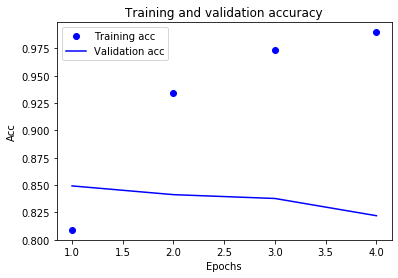

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

### Word Embeddings
In this section, we want to use a pre-trained word embedding to encode the reviews. To do so, we leverage the Google News Word2Vec model, a model that provides 300 semantic features for each word. These features are extracted concerning the position of the training word and by considering adjacent words in the training data (Google News). More detailed information will be discussed in your class later.

You can download the pre-trained model from [here](https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz), and you may want to use [gensim](https://radimrehurek.com/gensim/) to load the file. Next, you need to replace the document vector with the average of word vectors that are available in the W2V model. Use a weighted average to consider the frequency of a word as well as its presence.

In [0]:
'''
     Encode documents to a vector representation.
'''
xs = {'train': [], 'test': []} # Put the document vectors here
ys = {'train': [], 'test': []} # Put the label vectors here

  ########################################
  #     Put your implementation here     #
  ########################################
# %cd '..'
# ! wget -q https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
# ! pip install --upgrade gensim
# ! gunzip 'GoogleNews-vectors-negative300.bin.gz'
from gensim import models
import glob

%cd aclImdb
neg_data_train = []
for file in glob.glob("train/neg/*.txt"):
    neg_data_train.append(file)

pos_data_train = []
for file in glob.glob("train/pos/*.txt"):
    pos_data_train.append(file)

document = {'train': [], 'test': []}
labels = {'train': [], 'test': []} 

for i in range(3000) :
  document['train'].append(neg_data_train[i])
  labels['train'].append([0,1])
  document['train'].append(pos_data_train[i])
  labels['train'].append([1,0])

for i in range(500) :
  document['test'].append(neg_data_train[3000+i])
  labels['test'].append([0,1])
  document['test'].append(pos_data_train[3000+i])
  labels['test'].append([1,0])


with open('imdb.vocab', 'r') as content_file:
    words2 = content_file.read().split()


%cd '..'
words = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

%cd 'aclImdb'


/content/aclImdb
/content
/content/aclImdb


In [0]:
ys['train'] = np.array(labels.get('train'))
ys['test'] = np.array(labels.get('test'))

tmp_movie =[]
for text in document['train']:
    with open(text, 'r') as content_file:
      movie = content_file.read().split()
    tmp = np.zeros(len(words2))
    for x in movie :
      try:
        if(x in words.wv):
          tmp[words2.index(x)] = words.get_vector(x)
      except ValueError:
        pass
    tmp_movie.append(tmp)

xs['train'] = np.array(tmp_movie)

tmp_movie =[]  
for text in document['test']:
    with open(text, 'r') as content_file:
      movie = content_file.read().split()
    tmp = np.zeros(len(words2))
    for x in movie :
      try:
        if(x in words.wv):
          tmp[words2.index(x)] = words.get_vector(x)
      except ValueError:
        pass
    tmp_movie.append(tmp)
    
xs['test'] = np.array(tmp_movie)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [0]:
data = {'x_train': xs['train'], 'y_train': ys['train'],
        'x_test': xs['test'], 'y_test': ys['test']}
model = create_model(2, (data['x_train'].shape[1], ))
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy",f1,recall,precision])
history = model.fit(data['x_train'], data['y_train'],
              batch_size=32,
              epochs=20,
              validation_data=(data['x_test'], data['y_test']))

IndexError: ignored

In [0]:
history_dict = history.history
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

# 3. Image classification


In this part, We want to classify animal images according to their species (frog vs penguin).

First, we should download the dataset.

In [0]:
# Download the dataset
! wget -q http://iust-deep-learning.github.io/981/static_files/assignments/asg01_assets/data.zip
  
# Then, Extact it
! unzip data.zip -d .
! cat frog_url.txt

Archive:  data.zip
  inflating: ./peng_url.txt          
  inflating: ./frog_url.txt          
https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Tree_frog2.jpg/1200px-Tree_frog2.jpg
http://www.jigzone.com/p/jz/isA/TreeFrog.jpg
http://www.nationalgeographic.com/content/dam/animals/thumbs/rights-exempt/amphibians/r/red-eyed-tree-frog_thumb.ngsversion.1475172005418.adapt.1900.1.JPG
https://www.joshsfrogs.com/media/catalog/product/cache/1/image/265x150/9df78eab33525d08d6e5fb8d27136e95/r/e/red_eye_category_picture.jpg
http://www.normanmcmillan.com/wp-content/uploads/2012/07/tree_frog_slide1.jpg
http://www.activewild.com/wp-content/uploads/2015/09/Red-Eyed-Tree-Frog-Staring.jpg
http://www.backwaterreptiles.com/images/frogs/whites-tree-frog-for-sale.jpg
https://s-media-cache-ak0.pinimg.com/736x/e3/df/79/e3df79bb5e04dfb6e63e94df5998b447--cute-frogs-red-eyed-tree-frog.jpg
https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Gladiator_frog_Osa.JPG/220px-Gladiator_frog_Osa.JPG
https:

As you see, two files have the URL address of images, so you should download and save them in appropriate folders. Do it in this cell:

In [0]:
!mkdir 'frog'
!mkdir 'ping'
!cp 'frog_url.txt' 'frog'
!cp 'peng_url.txt' 'ping'
%cd 'frog'
import requests
import urllib.request
f = open('frog_url.txt', 'r')
cnt = 0
for url in f :
  try:
    requests.get(url)
    cnt += 1
    urllib.request.urlretrieve(url,str(cnt) + '.png')
  except:
    pass
!rm -f 'frog_url.txt'
%cd '..'
%cd 'ping'
f = open('peng_url.txt', 'r')
cnt = 0
for url in f :
  try:
    requests.get(url)
    cnt += 1
    urllib.request.urlretrieve(url,str(cnt) + '.png')
  except:
    pass
!rm -f 'peng_url.txt'
import os
FROG_PATH = 'frog'
PING_PATH = 'ping'
%cd '..'

/content/aclImdb/frog
/content/aclImdb
/content/aclImdb/ping
/content/aclImdb


As a suggestion, it is better to view some of the images at first. To do so, modify this code:

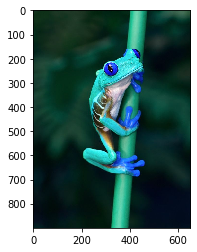

In [0]:
import cv2
import matplotlib.pyplot as plt

img_path = FROG_PATH + '/10.png'
img = cv2.imread(img_path)
plt.imshow(img)

Before going any further, we have to import some prerequisites:

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image as IMG
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
import numpy as np
import glob

In every deep learning task, we need to divide our dataset into train and test categories. The train category is used to train the model, and the test one is used to evaluate the trained model. The proportion of train and test dataset does not have any specific formula, and it is up to you, but you should consider the majority of the dataset as the train one.

In [0]:
  '''
    Split the images into train and test datasets
  '''
images = {'train': [], 'test': []} # Put the images here
labels = {'train': [], 'test': []} # Put the labels here

  ########################################
  #     Put your implementation here     #
  ########################################

ping_list = []
for file in glob.glob("ping/*.png"):
    ping_list.append(file)

frog_list = []
for file in glob.glob("frog/*.png"):
    frog_list.append(file)

for i in range(30) :
   images['train'].append(ping_list[i])
   labels['train'].append([1,0])
   images['train'].append(frog_list[i])
   labels['train'].append([0,1])
for i in range(9) :
   images['train'].append(frog_list[30 + i])
   labels['train'].append([0,1])

for i in range(10) :
   images['test'].append(ping_list[30 + i])
   labels['test'].append([1,0])

for i in range(10) :
   images['test'].append(frog_list[39 + i])
   labels['test'].append([0,1])


Now we change images to numeric feature vectors to feed them into the network.

To do so, we leverage the vgg16 model. It is a CNN model; these models will be discussed in the future.

In [0]:
vgg16_model = VGG16(weights='imagenet', include_top=False)
vgg16_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

To prepare images to feed them into the network, some preprocessing is required. Implement this in this cell. For example, you can normalize images.

In [0]:
def preprocess_image(image):
    """
    preprocess input image

    Args:
      image: 2d numpy array input image

    Returns:
      img: 2d numpy array preprocessed image
    """
    img = image.copy()
    
    ########################################
    #     Put your implementation here     #
    ########################################

    for i in img :
      i  = i/255

    return img

Now, you must first preprocess the images, then convert/encode them into feature vectors.

In [0]:
xs = {'train': [], 'test': []}
for image in images['train']:
    img = IMG.load_img(image, target_size = (224,244))
    img = cv2.resize(np.array(img), (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_image(img)
    features = vgg16_model.predict(img)
    ff = features.flatten()
    xs['train'].append(ff)

for image in images['test']:
    img = IMG.load_img(image, target_size = (224,244))
    img = cv2.resize(np.array(img), (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_image(img)
    features = vgg16_model.predict(img)
    ff = features.flatten()
    xs['test'].append(ff)

If you need to convert the labels into another format, you can do so by deleting the two last lines and implementing your code.

In [0]:
ys = {'train': [], 'test': []}
ys['train'] = np.array(labels['train'])
ys['test'] = np.array(labels['test'])

Now implement an MLP model for this task to separate frog images from penguin images.

If you want to import some modules or implement some helper functions or classes you can do it in this cell.

In [0]:
import h5py

Now, implement your MLP from scratch.

In [0]:
class MLP(object):

  def __init__(self, inputLen, hiddenLen, outputLen, learningRate):
        self.inputLen = inputLen
        self.outputLen = outputLen
        self.hiddenLen = hiddenLen
        self.weight_1 = np.random.rand(self.inputLen, self.hiddenLen)
        self.weight_2 = np.random.rand(self.hiddenLen, self.outputLen)
        self.learningRate = learningRate
        self.inputLayer = np.arange(inputLen)
        self.hiddenLayer = np.arange(hiddenLen)
        self.outputLayer = np.arange(outputLen)
        self.fault = np.zeros((1, self.outputLen))
        
  def train(self, x, y):
    """
    train MLP model on train data

    Args:
      x: 2d numpy array or list of train data
      y: 1d or 2d numpy array or list of train data labels
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    for i in range(5):
      for j in range(len(x)):
        self.inputLayer = x[j]
        self.hiddenLayer = np.dot(self.inputLayer, self.weight_1)
        self.hiddenLayer = sigmoid(self.hiddenLayer)
        self.outputLayer = np.dot(self.hiddenLayer, self.weight_2)
        self.fault = y[j] - self.outputLayer
        self.faultHidden = np.dot(self.fault, self.weight_2.T)
        self.faultHidden -= self.hiddenLayer
        self.backPropagationLastLayer()
        self.backPropagationHiddenLayer()
      print("epoch " + str(i+1) + " is done")
  
    return True

  def backPropagationLastLayer(self):
        for i in range(self.hiddenLen):
            for j in range(self.outputLen):
                self.weight_2[i][j] += self.learningRate * self.fault[j] * diff_sigmoid(self.outputLayer[j]) * \
                                       self.hiddenLayer[i]

  def backPropagationHiddenLayer(self):
        for i in range(self.inputLen):
            for j in range(self.hiddenLen):
                self.weight_1[i][j] += self.learningRate * self.faultHidden[j] * diff_sigmoid(self.hiddenLayer[j]) * \
                                      self.inputLayer[i]
  
  def test(self, x, y):
    """
    test MLP model on test data

    Args:
      x: 2d numpy array or list of test data
      y: 1d or 2d numpy array or list of test data labels

    Returns:
      acc: In the simplest way ratio between the number of correct predicts with the number 
           of all train data
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    acc = 0.0
    for i in range(len(x)):
      ans = self.predict(x[i])
      if(ans == np.argmax(y[i])):
        acc += 1/len(x)

    return acc
  
  def predict(self, x):
    """
    predict output of MLP model on input data

    Args:
      x: 1d or 2d numpy array or list of input data

    Returns:
      pred: 1d numpy array or list or integer that represent output predicted 
            from MLP
    """

    ########################################
    #     Put your implementation here     #
    ########################################

    self.inputLayer = x
    self.hiddenLayer = np.dot(self.inputLayer, self.weight_1)
    self.hiddenLayer = sigmoid(self.hiddenLayer)
    self.outputLayer = np.dot(self.hiddenLayer, self.weight_2)
    self.outputLayer = sigmoid(self.outputLayer)
    
    return np.argmax(self.outputLayer)
  
  def save_model(self, model_path):
    """
    save model to disk

    Args:
      model_path: path of model
    """

    ########################################
    #     Put your implementation here     #
    ########################################

    hf = h5py.File(model_path, 'w')
    hf.create_dataset('weight_1', data=self.weight_1)
    hf.create_dataset('weight_2', data=self.weight_2)
    hf.close()


    
    
    return True
  
  def load_model(self, model_path):
    """
    load model from disk

    Args:
      model_path: path of model
    """

    ########################################
    #     Put your implementation here     #
    ########################################
    hf = h5py.File(model_path, 'r')
    self.weight_1 = hf['weight_1'][:]
    self.weight_2 = hf['weight_2'][:]
    hf.close()

    return True

In [0]:
def initialize_model():
  """
  initilize a MLP model that classify Iris dataset
  
  Returns:
    model: A MLP object
               
  Hint: Consider the number of features in the Iris dataset and the number of its classes 
        and initialize weights.
  """
  
  ########################################
  #     Put your implementation here     #
  ########################################

  model = MLP(25088,10,2,0.5)
  
  return model

Evaluate your model(don't change this cell):

In [0]:
mlp = initialize_model()
mlp.train(xs['train'], ys['train'])
print('your model accuracy on test data is: %s' % (mlp.test(xs['test'], ys['test'])))
mlp.save_model('topvgg16_model.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


epoch 1 is done
epoch 2 is done
epoch 3 is done
epoch 4 is done
epoch 5 is done
your model accuracy on test data is: 0.9000000000000002


True

# Submission

Congratulations! You finished the assignment & you're ready to submit your work. Please follow the instruction:

1. Check and review your answers. Make sure all of the cell outputs are what you want. 
2. Select File > Save.
3. Run **Create Submission** cell, It may take several minutes and it may ask you for your credential.
4. Run **Download Submission** cell to obtain your submission as a zip file.
5. Grab downloaded file (`dl_asg01__xx__xx.zip`) and submit it via [https://forms.gle/3srwTZhBbc4KfXaR8](https://forms.gle/3srwTZhBbc4KfXaR8).

**Note: ** We need your Github token to create (if doesn't exist previously) new repository to store learned model data. Also Google Drive token enables us to download the current notebook & create a submission. If you are interested feel free to check our code.

## Create Submission (Run the cell)

In [0]:
#@title
! pip install -U --quiet PyDrive > /dev/null
! wget -q https://github.com/github/hub/releases/download/v2.10.0/hub-linux-amd64-2.10.0.tgz 
  
import os
import time
import yaml
import json

from google.colab import files
from IPython.display import Javascript
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

asg_name = 'assignment_01'
script_save = '''
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});
'''
repo_name = 'iust-deep-learning-assignments'
submission_file_name = 'dl_asg01__%s__%s.zip'%(student_id, student_name.lower().replace(' ',  '_'))

! tar xf hub-linux-amd64-2.10.0.tgz
! cd hub-linux-amd64-2.10.0/ && chmod a+x install && ./install
! hub config --global hub.protocol https
! hub config --global user.email "$Your_Github_account_Email"
! hub config --global user.name "$student_name"
! hub api --flat -X GET /user
! hub api -F affiliation=owner -X GET /user/repos > repos.json

repos = json.load(open('repos.json'))
repo_names = [r['name'] for r in repos]
has_repository = repo_name in repo_names
if not has_repository:
  get_ipython().system_raw('! hub api -X POST -F name=%s /user/repos > repo_info.json' % repo_name)
  repo_info = json.load(open('repo_info.json')) 
  repo_url = repo_info['clone_url']
else:
  for r in repos:
    if r['name'] == repo_name:
      repo_url = r['clone_url']
  
stream = open("/root/.config/hub", "r")
token = list(yaml.load_all(stream))[0]['github.com'][0]['oauth_token']
repo_url_with_token = 'https://'+token+"@" +repo_url.split('https://')[1]

! git clone "$repo_url_with_token"
! cp -r "$ASSIGNMENT_PATH" "$repo_name"/
! cd "$repo_name" && git add -A
! cd "$repo_name" && git commit -m "Add assignment 02 results"
! cd "$repo_name" && git push -u origin master

sub_info = {
    'student_id': student_id,
    'student_name': student_name, 
    'repo_url': repo_url,
    'asg_dir_contents': os.listdir(str(ASSIGNMENT_PATH)),
    'dateime': str(time.time()),
    'asg_name': asg_name
}
json.dump(sub_info, open('info.json', 'w'))

Javascript(script_save)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = drive.ListFile({'q':"title='%s.ipynb'"%asg_name}).GetList()[0]['id']
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('%s.ipynb'%asg_name) 

! jupyter nbconvert --to script "$asg_name".ipynb > /dev/null
! jupyter nbconvert --to html "$asg_name".ipynb > /dev/null
! zip "$submission_file_name" "$asg_name".ipynb "$asg_name".html "$asg_name".txt info.json > /dev/null

print("##########################################")
print("Done! Submisson created, Please download using the bellow cell!")

github.com username: bardiakzzzz
github.com password for bardiakzzzz (never stored): 
.login	bardiakzzzz
.id	39650433
.node_id	MDQ6VXNlcjM5NjUwNDMz
.avatar_url	https://avatars0.githubusercontent.com/u/39650433?v=4
.gravatar_id	
.url	https://api.github.com/users/bardiakzzzz
.html_url	https://github.com/bardiakzzzz
.followers_url	https://api.github.com/users/bardiakzzzz/followers
.following_url	https://api.github.com/users/bardiakzzzz/following{/other_user}
.gists_url	https://api.github.com/users/bardiakzzzz/gists{/gist_id}
.starred_url	https://api.github.com/users/bardiakzzzz/starred{/owner}{/repo}
.subscriptions_url	https://api.github.com/users/bardiakzzzz/subscriptions
.organizations_url	https://api.github.com/users/bardiakzzzz/orgs
.repos_url	https://api.github.com/users/bardiakzzzz/repos
.events_url	https://api.github.com/users/bardiakzzzz/events{/privacy}
.received_events_url	https://api.github.com/users/bardiakzzzz/received_events
.type	User
.site_admin	false
.name	
.company	
.blo

## Download Submission (Run the cell)

In [0]:
#@title
files.download(submission_file_name)

If that cell makes an error when running you can download file dl_asg01_your_struden_id_your_name.zip from left panel and files section by right-clicking on it and choosing download button.

# Special Thanks

Special thanks to Amirhossein Kazemnejad and Kiamehr Razaee for creating the template of deep learning course assignments.